## Scatter Plots | Asteroid Impact Probability

Let's take a look at how some of these variables are related using scatter plots. Scatter plots are great for visualizing relationships between a few numerical fields

#### Import Libraries & Setup Engines

In [1]:
from datetime import datetime as dt 
import numpy as np
import pandas as pd
import sqlalchemy as sql
import matplotlib.pyplot as plt
import seaborn as sns

sql_engine = sql.create_engine('mssql+pyodbc://@localhost')

ModuleNotFoundError: No module named 'sqlalchemy'

#### Read SQL table
This is the NASA's Sentry system data from the **histograms** and **correlation_matrix** notebooks

In [2]:
table = 'ASTEROID_IMPACT'

query = f"SELECT * FROM {table}"
df = pd.read_sql_query(query, sql_engine, index_col='Object Name')
df.head()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
Object Name,,,,,,,,,,
2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


### Magnitude vs Diameter
In the **correlation_matrix** notebook, we were confused about why magnitude and diameter are negatively correlated

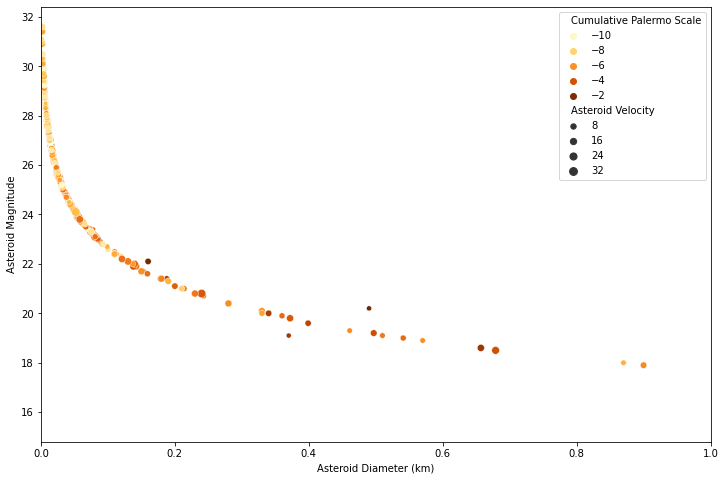

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Asteroid Diameter (km)', y='Asteroid Magnitude', data=df, size='Asteroid Velocity', hue='Cumulative Palermo Scale', palette='YlOrBr')
plt.xlim(0,1)
plt.show()

It does look like this is a pretty clear inverse relationship, and might be an artifact of the measurement procedure, or indicate that magnitude is adjusted for diameter, or vice-versa. It looks like more dangerous NEOs have larger diameter and smaller magnitudes. 

### Periods & Number of Impacts
For the most part, more dangerous NEOs have more time & opportunities to possibly impact, but the relationship doesn't look as strong as I was expecting

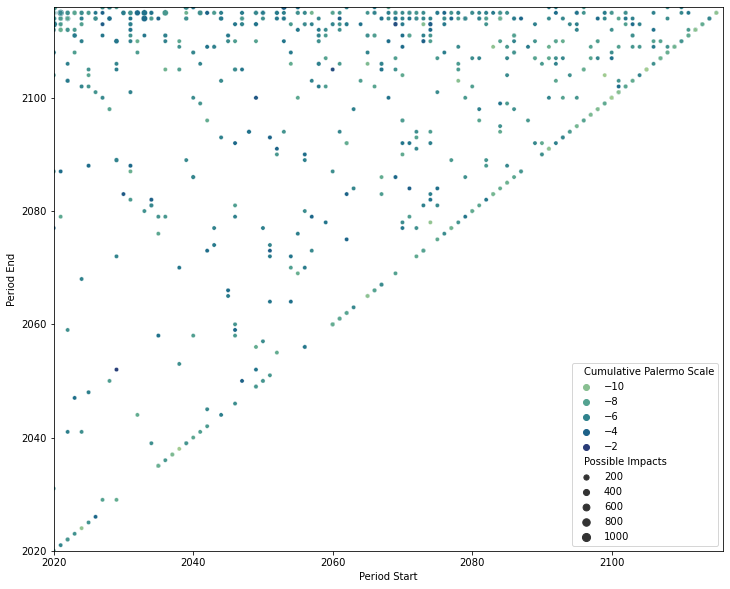

In [45]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Period Start', y='Period End', data=df, size='Possible Impacts', hue='Cumulative Palermo Scale', palette='crest')
plt.xlim(2020,2116)
plt.ylim(2020,2116)
plt.show()

### Size vs Velocity
It doesn't look like there's an obvious, distinguishable impact of size on speed, which is interesting

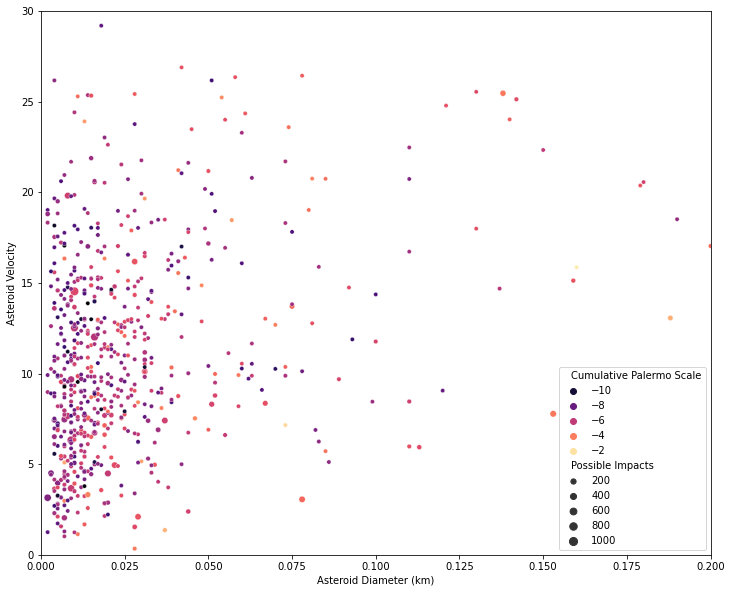

In [49]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Asteroid Diameter (km)', y='Asteroid Velocity', data=df, size='Possible Impacts', hue='Cumulative Palermo Scale', palette='magma')
plt.xlim(0,0.2)
plt.ylim(0,30)
plt.show()

### Palermo Scale
As expected, a combination of size and impact probability seem to influence Palermo score.  We could get a better idea of these effects using regression analysis

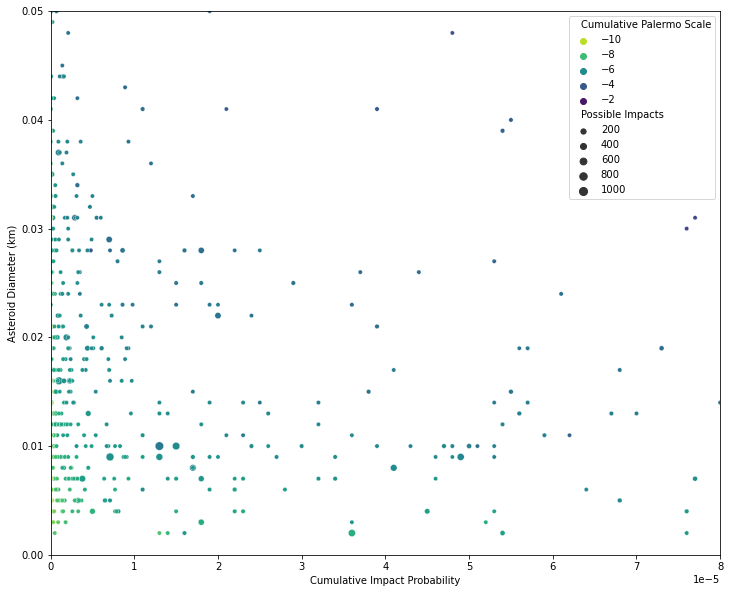

In [48]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Cumulative Impact Probability', y='Asteroid Diameter (km)', data=df, size='Possible Impacts', hue='Cumulative Palermo Scale', palette='viridis_r')
plt.xlim(0,0.00008)
plt.ylim(0,0.05)
plt.show()

### Findings
We figured out that there is in fact a very tight inverse relationship between magnitude and diameter, which we would want to ask the researchers about at this point. We got a better idea of how the number of potential impacts is related to the timing of periods, found that size and velocity aren't dependant in a way you'd intuitively think, and got a decent visual representation for how Palermo score is determined by size and impact probability.  To get a better idea of how impact probability and Palermo scores are influenced by these variables, we would want to build a regression model.. but since these relationships don't seem altogether very robust, we are likely going to utilize some other datasets to showcase regression models. 